#Классификация читаемых и нечитаемых трубопроводов

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
images_dir = '/content/drive/My Drive/pipelines_ds/train'
classes = ['true', 'false']
train_images = np.concatenate([os.listdir(os.path.join(images_dir, class_)) for class_ in classes])
train_answers = [0]*len(os.listdir(os.path.join(images_dir, classes[0]))) + \
                [1]*len(os.listdir(os.path.join(images_dir, classes[1])))

In [5]:
train_hog_features = []
answers = []

hog = cv2.HOGDescriptor()

for i, class_ in enumerate(classes):
    images = os.listdir(os.path.join(images_dir, class_))
    for image in images:
        try:
            img = cv2.imread(os.path.join(os.path.join(images_dir, class_), image))
            # уменьшим немного размер изображения, чтобы длина hog-вектора была поменьше
            img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)
            img_hog_feature = hog.compute(img)
            
            train_hog_features.append(img_hog_feature)
            answers.append(i)
        except Exception as e:
            print(image)

In [6]:
train_hog_features = np.squeeze(np.array(train_hog_features))

In [7]:
train_hog_features.shape

(60, 680400)

In [8]:
from sklearn.linear_model import LogisticRegression

In [10]:
logreg1 = LogisticRegression(max_iter=10000)

In [13]:
logreg1.fit(train_hog_features, answers)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
images_dir = '/content/drive/My Drive/pipelines_ds/test'
classes = ['true', 'false']
test_images = np.concatenate([os.listdir(os.path.join(images_dir, class_)) for class_ in classes])
test_answers = [0]*len(os.listdir(os.path.join(images_dir, classes[0]))) + \
                [1]*len(os.listdir(os.path.join(images_dir, classes[1])))

In [15]:
test_hog_features = []
test_answers = []

hog = cv2.HOGDescriptor()

for i, class_ in enumerate(classes):
    images = os.listdir(os.path.join(images_dir, class_))
    for image in images:
        try:
            img = cv2.imread(os.path.join(os.path.join(images_dir, class_), image))
            img = cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)
            img_hog_feature = hog.compute(img)
            test_hog_features.append(img_hog_feature)
            test_answers.append(i)
        except Exception as e:
            print(image)

In [16]:
test_hog_features = np.squeeze(np.array(test_hog_features))

In [17]:
pred_logreg1 = logreg1.predict_proba(test_hog_features)

In [19]:
pred_all = []
for pred1 in pred_logreg1:
    if pred1[0] > 0.5:
        pred_all.append(0)
    else:
        pred_all.append(1)

(array([ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

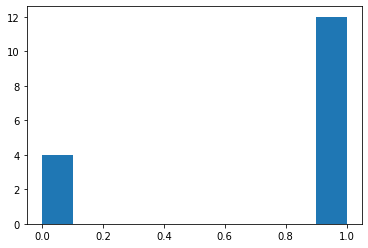

In [21]:
plt.hist(pred_all)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(test_answers, pred_all)

1.0

In [63]:
import pickle

In [64]:
def write_pickle(file, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(file, f)

In [65]:
write_pickle(logreg1, "classify_pipelines")

#Вывод текста с изображений

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [57]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [59]:
! apt install tesseract-ocr-rus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-rus
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 1,272 kB of archives.
After this operation, 3,877 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-rus all 4.00~git24-0e00fe6-1.2 [1,272 kB]
Fetched 1,272 kB in 1s (1,450 kB/s)
Selecting previously unselected package tesseract-ocr-rus.
(Reading database ... 161141 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-rus_4.00~git24-0e00fe6-1.2_all.deb ...
Unpacking tesseract-ocr-rus (4.00~git24-0e00fe6-1.2) ...
Setting up tesseract-ocr-rus (4.00~git24-0e00fe6-1.2) ...


In [37]:
!pip install pytesseract

In [38]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pytesseract

In [46]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [42]:
images_dir = '/content/drive/My Drive/pipelines_ds/train'
classes = ['true', 'false']
train_images = np.concatenate([os.listdir(os.path.join(images_dir, class_)) for class_ in classes])
train_answers = [0]*len(os.listdir(os.path.join(images_dir, classes[0]))) + \
                [1]*len(os.listdir(os.path.join(images_dir, classes[1])))

In [62]:
train_hog_features = []
answers = []

hog = cv2.HOGDescriptor()
for i, class_ in enumerate(classes):
    if class_== 'true':
      g = 1
      images = os.listdir(os.path.join(images_dir, class_))
      for image in images:
        # Алгоритм нахождения текста на картинке по сути - строки снизу
        img = cv2.imread(os.path.join(os.path.join(images_dir, class_), image))
        # Будет выведен весь текст с картинки
        config = r'--oem 3 --psm 6'
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        print(str(g) + ": " + pytesseract.image_to_string(img, config=config, lang="rus").split('.')[0])
        g += 1


1: Принципиальная схема подключения высоконапорных водоводов ом ь
Каменного лу
2: Принципиальная схема подключения
— высоконапорного водовода Ем-ёговского л
3: Принципиальная схема подключения высоконапорных водоводов_
пони

^
Река чм а =
— 242)

и бы

Ф

’

4: а оон ними
ет
ыы
роты
Га
„” { \ %
< ы
2 2
А 2
8 2%
в
Е

5: Принципиальная схема подключения нефтесборного трубопровода 
6: Принципиальная схема подключения нефтесборного трубопровода
«к
7: Принципиальная схема подключения
нефтесборного трубопровода
к
8: Принципиальная схема подключения нефтесборного
«к
9: Принципиальная схема подключения нефтесборного трубопровода
«к 5406  т
10: Принципиальная схема подключения нефтесборного трубопровода
«к
11: , Принципиальная схема подключения нефтесборного трубопровода
‘Каменного л
12: приртиьний сны подетнии ышитстерихо воно
'Ем-Еговского+Пальяновского л
13: Принципиальная схема подключения
‘нефтесборных трубопроводов Ем-Еговского+Пальяновского л
14: Принципиальная ‘схема подключения
высок